In [ ]:
import requests
import pandas as pd
import io
username = 'tituslhy'
token = 'xxxxx'
github_session = requests.Session()
github_session.auth = (username,token)
train_url = 'https://raw.githubusercontent.com/teyang-lau/coffee-joint-rec-sys/main/data/processed/train_lol.csv'
val_url = 'https://raw.githubusercontent.com/teyang-lau/coffee-joint-rec-sys/main/data/processed/val_lol.csv'
test_url = 'https://raw.githubusercontent.com/teyang-lau/coffee-joint-rec-sys/main/data/processed/test_lol.csv'

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [ ]:
train_download = github_session.get(train_url).content
train_df = pd.read_csv(io.StringIO(train_download.decode('utf-8')))
train_df = train_df[['shop','userid','rating','date']]

val_download = github_session.get(val_url).content
val_df = pd.read_csv(io.StringIO(val_download.decode('utf-8')))
val_df = val_df[['shop','userid','rating','date']]

test_download = github_session.get(test_url).content
test_df = pd.read_csv(io.StringIO(test_download.decode('utf-8')))
test_df = test_df[['shop','userid','rating','date']]

df = pd.concat([train_df,val_df,test_df])
df['year']=df['date'].str[:4]
df.head()

,shop,userid,rating,date,year
0,liho-tea-singapore-117,-5YMIME_WEin_by41Bj-3Q,3.0,2021-08-01,2021
1,old-hen-coffee-bar-singapore-2,-5YMIME_WEin_by41Bj-3Q,4.0,2021-08-05,2021
2,two-men-bagel-house-singapore,-5YMIME_WEin_by41Bj-3Q,4.0,2021-08-07,2021
3,old-airport-road-food-centre-singapore,-5YMIME_WEin_by41Bj-3Q,5.0,2021-08-07,2021
4,the-book-cafe-singapore,-G1YjYxjDpxOBzFgo36ORA,3.0,2013-07-05,2013


In [ ]:
years = sorted([int(year) for year in list(df['year'].unique())],reverse=True)
recent_years = [str(years[i]) for i in range(len(years))]

In [63]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(25,250))
top_10_container = defaultdict(list)

for i, year in enumerate(recent_years,1):
  plt.subplot(13,1,i).set_title(f'Graph of cafes reviewed in {year}')
  df_plot = df[df['year']==year][['userid','shop','rating']].reset_index().drop(labels='index',axis=1)
  shops = list(df_plot.shop.unique())
  users = list(df_plot.userid.unique())

  G=nx.from_pandas_edgelist(df_plot,source='userid',target = 'shop',edge_attr = ['rating'])
  layout = nx.nx_agraph.graphviz_layout(G)
  shop_size = [G.degree(shop) * 50 for shop in shops]
  nx.draw_networkx_nodes(G, 
                        layout, 
                        nodelist=shops, 
                        node_size=shop_size, # a LIST of sizes, based on g.degree
                        node_color='lightblue')

  nx.draw_networkx_nodes(G, layout, nodelist=users, node_color='#cccccc', node_size=100)
  
  top_10 = sorted(dict(G.degree(shops)).items(),key=lambda x:x[1],reverse=True)[:10]
  top_10_cafes = [tup[0] for tup in top_10]
  top_10_container[year].append(top_10_cafes)
  nx.draw_networkx_nodes(G, layout, nodelist=top_10_cafes, node_color='orange', node_size=800)
  nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

  node_labels = dict(zip(top_10_cafes, top_10_cafes))
  nx.draw_networkx_labels(G, layout, labels=node_labels, font_size=20)

plt.tight_layout()
plt.show()
# plt.savefig('cafe_graphs.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Create list of top 5 users per year
top_users_ = defaultdict(list)
for year in recent_years:
  top_5_users = dict(df[df['year']==year]['userid'].value_counts().head())
  top_users_[year].append(list(top_5_users.keys()))

In [ ]:
user_list = set()
values = list(top_users_.values())
for val in values:
  for user in val[0]:
    user_list.add(user)

In [ ]:
df_ = df[df['userid'].isin(user_list)]
df_.drop(['date'],axis=1, inplace=True)
df_.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,shop,userid,rating,year
0,liho-tea-singapore-117,-5YMIME_WEin_by41Bj-3Q,3.0,2021
1,old-hen-coffee-bar-singapore-2,-5YMIME_WEin_by41Bj-3Q,4.0,2021
2,two-men-bagel-house-singapore,-5YMIME_WEin_by41Bj-3Q,4.0,2021
3,old-airport-road-food-centre-singapore,-5YMIME_WEin_by41Bj-3Q,5.0,2021
38,hoshino-coffee-singapore-4,0V_C2aOTDKuR8CO3P3RvJw,4.0,2016


Plotting a graph of the cafes reviewed by the top users each year. If the cafe reviewed is in the top 10 cafes of that year, we color it with an orange circle.

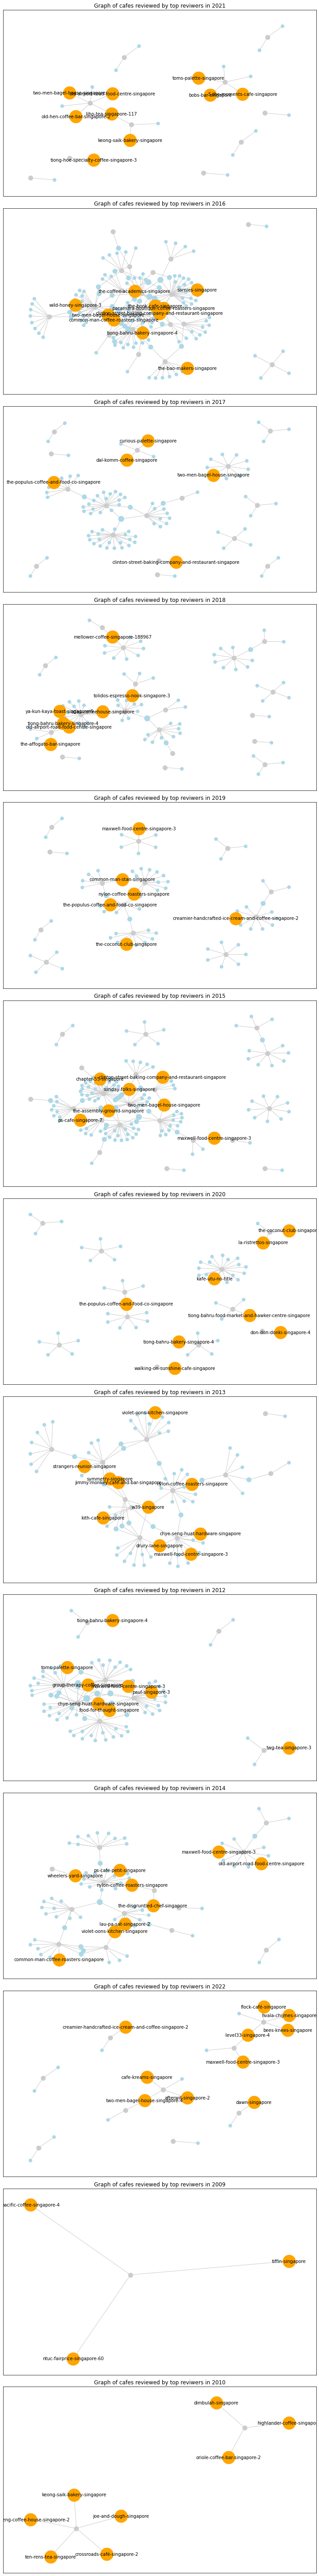

In [ ]:
fig = plt.figure(figsize=(10,80))

for i, year in enumerate(list(df_['year'].unique()),1):
  
  plt.subplot(df_['year'].nunique(),1,i).set_title(f'Graph of cafes reviewed by top reviwers in {year}')
  df_plot = df_[df_['year']==year][['userid','shop','rating']].reset_index().drop(labels='index',axis=1)
  shops = list(df_plot.shop.unique())
  users = list(df_plot.userid.unique())

  G2=nx.from_pandas_edgelist(df_plot,source='userid',target = 'shop',edge_attr = ['rating'])
  layout = nx.nx_agraph.graphviz_layout(G2)
  shop_size = [G2.degree(shop) * 50 for shop in shops]
  nx.draw_networkx_nodes(G2, 
                        layout, 
                        nodelist=shops, 
                        node_size=shop_size, # a LIST of sizes, based on g.degree
                        node_color='lightblue')

  nx.draw_networkx_nodes(G2, layout, nodelist=users, node_color='#cccccc', node_size=100)
  popular = []
  for shop in shops:
    if shop in top_10_container[year][0]:
      popular.append(shop)

  nx.draw_networkx_nodes(G2, layout, nodelist=popular, node_color='orange', node_size=800)
  nx.draw_networkx_edges(G2, layout, width=1, edge_color="#cccccc")

  node_labels = dict(zip(popular, popular))
  nx.draw_networkx_labels(G2, layout, labels=node_labels, font_size=10)

plt.tight_layout()
plt.show()